# Profit and Loss of the Black-Scholes hedging

In [149]:
import numpy as np 
import matplotlib.pyplot as plt 

In [150]:
n = 500
sigma_0 = 0.2 
S0 = 100
lamda = 2 
c = 0.4
gamma = 0.3 
T = 2 #years
mean = 0 
std = 1 
r = 0.02
sample_size = 1000

## Question 1:

In [151]:
#forward simulation of the brownian motion  

def forward_simulation(n=n, T=T):
    delta_T = T / n
    Z = np.random.normal(mean, std, size=(n + 1))
    W = np.zeros(n + 1) 
    W[0] = Z[0] * np.sqrt(delta_T)
    for j in range(1, n + 1):
        W[j] = W[j-1] + np.sqrt(delta_T) * Z[j] 
    return W


In [152]:
#simulation of discrete path of a stochastic volatility   

def discrete_vola(lamda=lamda, sigma_0=sigma_0, c=c, gamma=gamma, n=n, T=T): 
    sigma = np.zeros((sample_size, n + 1))
    delta_T = T / n
    for j in range(sample_size):
        W = forward_simulation(n, T)
        sigma[j, 0] = sigma_0
        for i in range(1, n + 1):
            sigma[j, i] = sigma[j, i - 1] + lamda * (c - sigma[j, i - 1]) * delta_T + gamma * (W[i] - W[i - 1])
    return sigma 



In [153]:
#three trajectories of discrete volatility paths

sigma = discrete_vola()

X = np.arange(0, 2 + 1 / n, T / n)

#three exemples from the 1000 simulations
Y1 = sigma[250,:]
Y2 = sigma[500,:]
Y3 = sigma[750,:]


In [154]:
#three trajectories of discrete volatility paths

sigma = discrete_vola(c=1)

X = np.arange(0, 2 + 1 / n, T / n)

#three exemples from the 1000 simulations
Z1 = sigma[250,:]
Z2 = sigma[500,:]
Z3 = sigma[750,:]


In [155]:
#three trajectories of discrete volatility paths

sigma = discrete_vola(sigma_0=0.8)

X = np.arange(0, 2 + 1 / n, T / n)

#three exemples from the 1000 simulations
X1 = sigma[250,:]
X2 = sigma[500,:]
X3 = sigma[750,:]

Used parameters :
Sample size = 1000
sigma_0 = 0.200 
lamda = 2.000
c = 0.400
gamma = 0.300


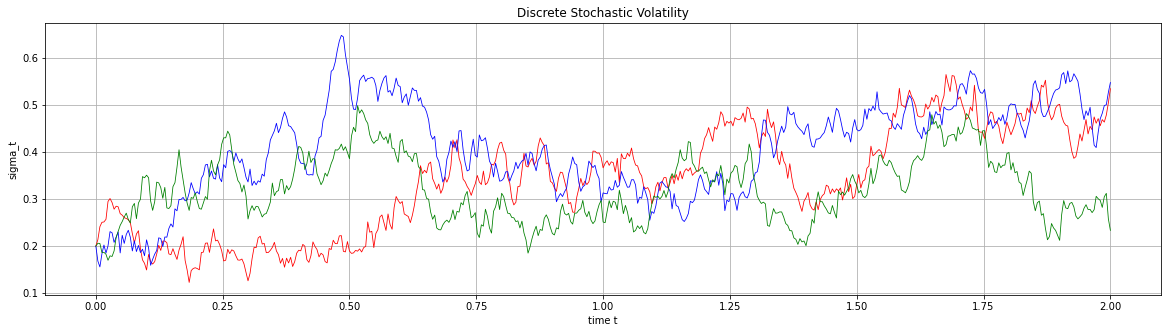

In [156]:
#ploting
plt.figure(figsize=(20,5))
plt.plot(X, Y1, 'r-', linewidth=0.8)
plt.plot(X, Y2, 'b-', linewidth=0.8)
plt.plot(X, Y3, 'g-', linewidth=0.8)
plt.xlabel("time t")
plt.ylabel("sigma_t")
plt.title('Discrete Stochastic Volatility')
plt.grid()
print("Used parameters :")
print("Sample size = %d" %(sample_size))       
print("sigma_0 = %1.3f " %(sigma_0))
print("lamda = %1.3f" %(lamda))
print("c = %1.3f" %(c))
print("gamma = %1.3f" %(gamma))
plt.show()

Used parameters :
Sample size = 1000
sigma_0 = 0.200 
lamda = 2.000
c = 1.000
gamma = 0.300


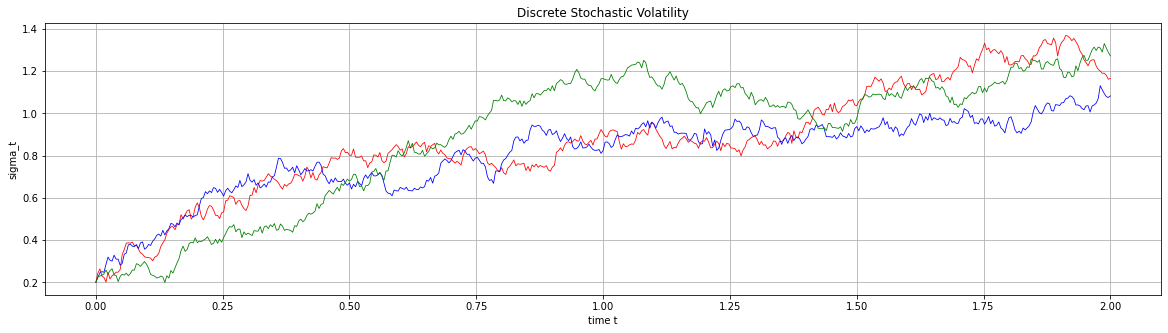

In [159]:
#ploting
plt.figure(figsize=(20,5))
plt.plot(X, Z1, 'r-', linewidth=0.8)
plt.plot(X, Z2, 'b-', linewidth=0.8)
plt.plot(X, Z3, 'g-', linewidth=0.8)
plt.xlabel("time t")
plt.ylabel("sigma_t")
plt.title('Discrete Stochastic Volatility')
plt.grid()
print("Used parameters :")
print("Sample size = %d" %(sample_size))       
print("sigma_0 = %1.3f " %(0.2))
print("lamda = %1.3f" %(lamda))
print("c = %1.3f" %(1))
print("gamma = %1.3f" %(gamma))
plt.show()

Used parameters :
Sample size = 1000
sigma_0 = 0.800 
lamda = 2.000
c = 0.400
gamma = 0.300


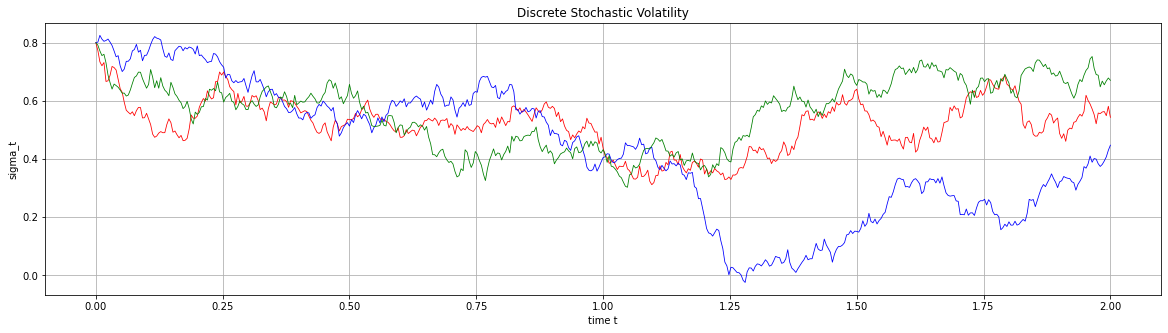

In [162]:
#ploting
plt.figure(figsize=(20,5))
plt.plot(X, X1, 'r-', linewidth=0.8)
plt.plot(X, X2, 'b-', linewidth=0.8)
plt.plot(X, X3, 'g-', linewidth=0.8)
plt.xlabel("time t")
plt.ylabel("sigma_t")
plt.title('Discrete Stochastic Volatility')
plt.grid()
print("Used parameters :")
print("Sample size = %d" %(sample_size))       
print("sigma_0 = %1.3f " %(0.8))
print("lamda = %1.3f" %(lamda))
print("c = %1.3f" %(0.4))
print("gamma = %1.3f" %(gamma))
plt.show()

The drift of the Ornstein_Uhlenbeck makes it that the volatility bounce back to c whith a speed that depends on lamda. 

We observe from the third graph that the volatility may become negatif which is incoherent with the reality and the definition of the volatility.

c is called "the long term mean" since the mean of the process converge to c as t goes to infinity.

## Question 2:

In [163]:
#simulation of discrete path of a stochastic volatility   

def discrete_asset(S0=S0, lamda=lamda, sigma_0=sigma_0, c=c, gamma=gamma, n=n, T=T): 
    sigma = discrete_vola(lamda=lamda, sigma_0=sigma_0, c=c, gamma=gamma, n=n, T=T)
    delta_T = T / n
    S = np.zeros((sample_size, n + 1))
    for j in range(sample_size):
        W = forward_simulation(n, T)
        S[j, 0] = S0
        for i in range(1, n + 1):
            S[j, i] = S[j, i - 1] * (1 + sigma[j, i - 1] * (W[i] - W[i - 1])) 
    return S 



In [164]:
#three trajectories of discrete asset paths

S = discrete_asset()

X = np.arange(0, 2 + 1 / n, T / n)

#three exemples from the 1000 simulations
Y1 = S[250,:]
Y2 = S[500,:]
Y3 = S[750,:]

Used parameters :
Sample size = 1000
sigma_0 = 0.200 
lamda = 2.000
c = 0.400
gamma = 0.300
S0 = 100.000 


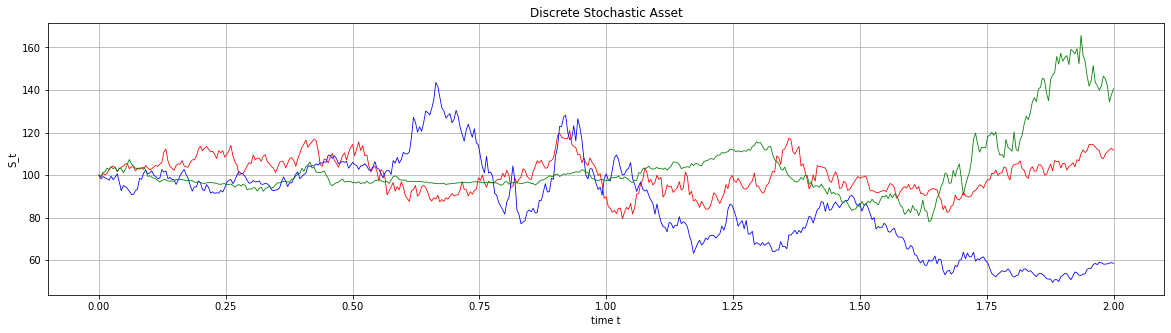

In [165]:
#ploting
plt.figure(figsize=(20,5))
plt.plot(X, Y1, 'r-', linewidth=0.8)
plt.plot(X, Y2, 'b-', linewidth=0.8)
plt.plot(X, Y3, 'g-', linewidth=0.8)
plt.xlabel("time t")
plt.ylabel("S_t")
plt.title('Discrete Stochastic Asset')
plt.grid()
print("Used parameters :")
print("Sample size = %d" %(sample_size))       
print("sigma_0 = %1.3f " %(sigma_0))
print("lamda = %1.3f" %(lamda))
print("c = %1.3f" %(c))
print("gamma = %1.3f" %(gamma))
print("S0 = %1.3f " %(S0))
plt.show()

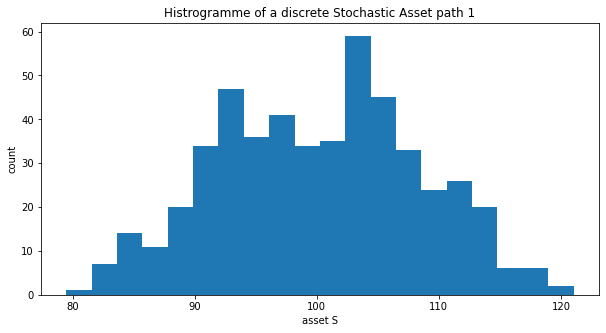

In [170]:
#ploting
plt.figure(figsize=(10,5))
plt.hist(Y1, bins=20)
plt.xlabel("asset S")
plt.ylabel("count")
plt.title('Histrogramme of a discrete Stochastic Asset path 1')
plt.show()

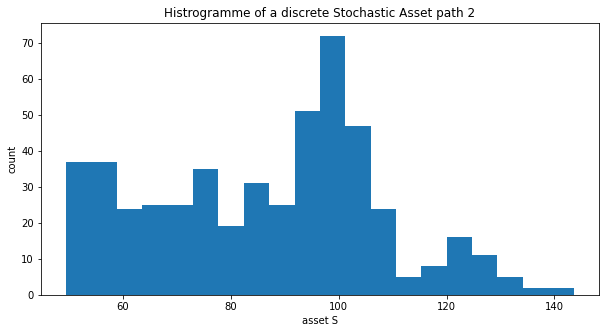

In [171]:
#ploting
plt.figure(figsize=(10,5))
plt.hist(Y2, bins=20)
plt.xlabel("asset S")
plt.ylabel("count")
plt.title('Histrogramme of a discrete Stochastic Asset path 2')
plt.show()

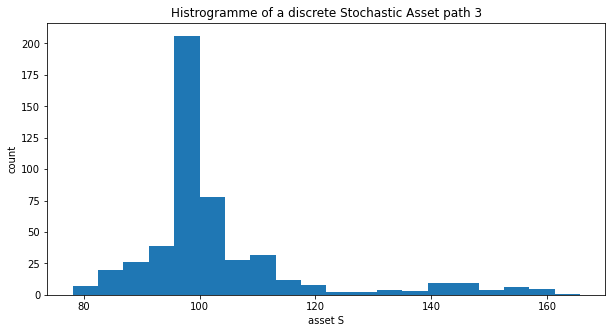

In [172]:
#ploting
plt.figure(figsize=(10,5))
plt.hist(Y3, bins=20)
plt.xlabel("asset S")
plt.ylabel("count")
plt.title('Histrogramme of a discrete Stochastic Asset path 3')
plt.show()

## Question 3:

In [87]:
#Gamma of Black and Scholes model:
def d_plus(s, k, v): 
    res = np.log(s / k) / np.sqrt(v) + 1 / 2 * np.sqrt(v)
    return res

def Gamma_BS(t, s, Sigma, K, T=T):
    N_prime = (2 * np.pi) ** (- 1 / 2) * np.exp(- d_plus(s, K * np.exp(- r * T), Sigma ** 2 * T)) 
    res = N_prime / (s * Sigma * np.sqrt(T - t))
    return res

In [88]:
def discrete_asset_2(sigma, S0=S0): 
    delta_T = T / n
    S = np.zeros((sample_size, n + 1))
    for j in range(sample_size):
        W = forward_simulation(n, T)
        S[j, 0] = S0
        for i in range(1, n + 1):
            S[j, i] = S[j, i - 1] * (1 + sigma[j, i - 1] * (W[i] - W[i - 1])) 
    return S 

In [91]:
#simulation of discrete path of a stochastic volatility   

def discrete_PnL(K, S0=S0, lamda=lamda, sigma_0=sigma_0, c=c, gamma=gamma, n=n, T=T, r=r, Sigma=sigma_0): 
    sigma = discrete_vola(lamda=lamda, sigma_0=sigma_0, c=c, gamma=gamma, n=n, T=T) 
    S = discrete_asset_2(sigma, S0=S0)
    delta_T = T / n
    PnL = np.zeros(sample_size)
    for j in range(sample_size):
        Reiman_sum = 0
        for i in range(n):
            t_i = i * delta_T
            Reiman_sum += np.exp(r * (T - t_i)) * (Sigma ** 2 - sigma[j,i] ** 2) * (S[j,i] ** 2) * Gamma_BS(t_i, S[j,i], Sigma, K) * delta_T
        PnL[j] = Reiman_sum
    return 1 / 2 * PnL

In [119]:
n = 50
Ks = np.arange(50, 155, 5)
Y = np.array([np.mean(discrete_PnL(K)) for K in Ks])
Var = np.array([np.var(discrete_PnL(K)) for K in Ks])

Used parameters :
n = 50.000
Sample size = 1000
sigma_0 = 0.200 
lamda = 2.000
c = 0.400
gamma = 0.300
S0 = 100.000 
r = 0.020 


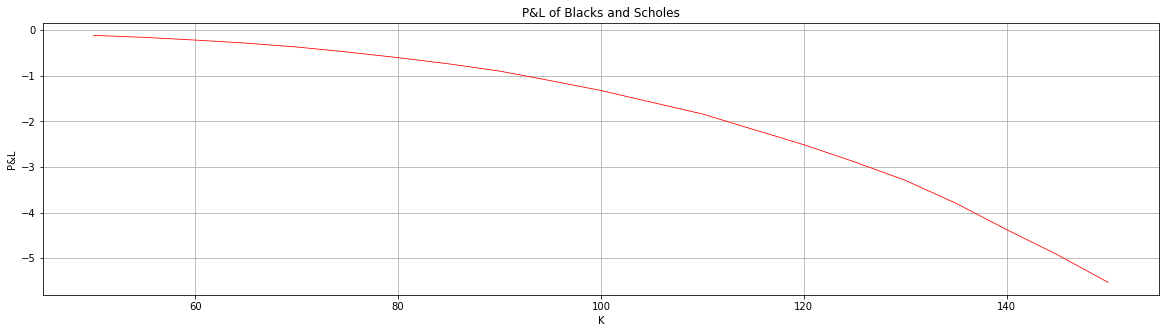

In [120]:
#ploting
plt.figure(figsize=(20,5))
plt.plot(Ks, Y, 'r-', linewidth=0.8)
plt.xlabel("K")
plt.ylabel("P&L")
plt.title('P&L of Blacks and Scholes')
plt.grid()
print("Used parameters :")
print("n = %1.3f" %(50))     
print("Sample size = %d" %(sample_size))       
print("sigma_0 = %1.3f " %(sigma_0))
print("lamda = %1.3f" %(lamda))
print("c = %1.3f" %(c))
print("gamma = %1.3f" %(gamma))
print("S0 = %1.3f " %(S0))
print("r = %1.3f " %(r))
plt.show()

The P&L is negative because Sigma = 0.2 and the volatility as we saw before will increase from 0.2 to arround 0.4 so the P&L will stay negatif

Here im gonna change the paramters so that Sigma is bigger than the volatility and as we can see the P&L will be positive:

In [177]:
n = 50
Ks = np.arange(50, 155, 5)
Y3 = np.array([np.mean(discrete_PnL(K, Sigma=0.4, sigma_0 = 0.4, c=0.2, n=n)) for K in Ks])

Used parameters :
n = 50.000
Sample size = 1000
sigma_0 = 0.200 
lamda = 2.000
c = 0.400
gamma = 0.300
S0 = 100.000 
r = 0.020 


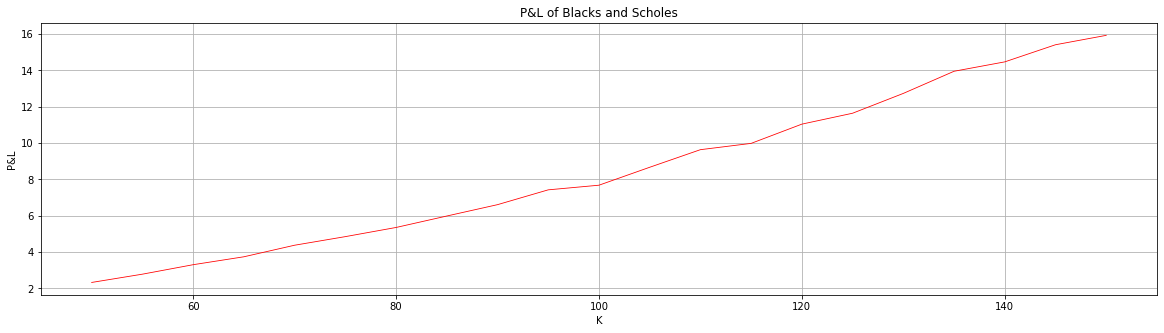

In [178]:
#ploting
plt.figure(figsize=(20,5))
plt.plot(Ks, Y3, 'r-', linewidth=0.8)
plt.xlabel("K")
plt.ylabel("P&L")
plt.title('P&L of Blacks and Scholes')
plt.grid()
print("Used parameters :")
print("n = %1.3f" %(50))     
print("Sample size = %d" %(sample_size))       
print("sigma_0 = %1.3f " %(sigma_0))
print("lamda = %1.3f" %(lamda))
print("c = %1.3f" %(c))
print("gamma = %1.3f" %(gamma))
print("S0 = %1.3f " %(S0))
print("r = %1.3f " %(r))
plt.show()

Used parameters :
n = 50.000
Sample size = 1000
sigma_0 = 0.200 
lamda = 2.000
c = 0.400
gamma = 0.300
S0 = 100.000 
r = 0.020 


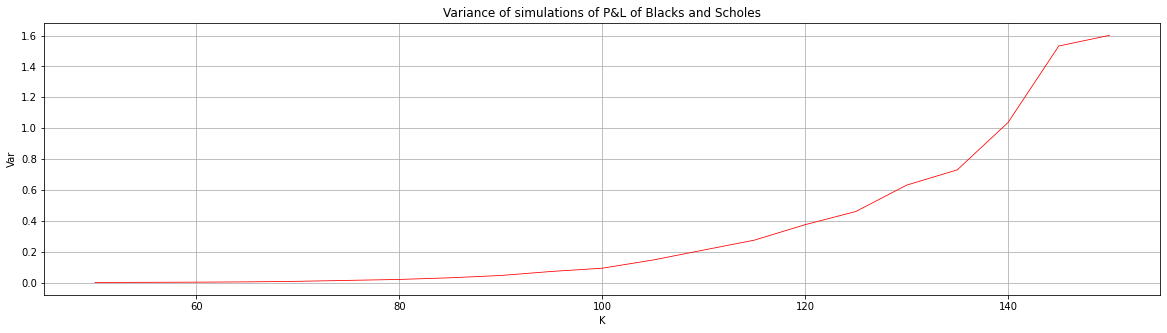

In [121]:
#ploting
plt.figure(figsize=(20,5))
plt.plot(Ks, Var, 'r-', linewidth=0.8)
plt.xlabel("K")
plt.ylabel("Var")
plt.title('Variance of simulations of P&L of Blacks and Scholes')
plt.grid()
print("Used parameters :")
print("n = %1.3f" %(50))     
print("Sample size = %d" %(sample_size))       
print("sigma_0 = %1.3f " %(sigma_0))
print("lamda = %1.3f" %(lamda))
print("c = %1.3f" %(c))
print("gamma = %1.3f" %(gamma))
print("S0 = %1.3f " %(S0))
print("r = %1.3f " %(r))
plt.show()

In [122]:
n = 60
Ks = np.arange(50, 155, 5)
Y2 = np.array([np.mean(discrete_PnL(K, n=n)) for K in Ks])
Var2 = np.array([np.var(discrete_PnL(K, n=n)) for K in Ks])

Used parameters :
n = 60.0
Sample size = 1000
sigma_0 = 0.200 
lamda = 2.000
c = 0.400
gamma = 0.300
S0 = 100.000 
r = 0.020 


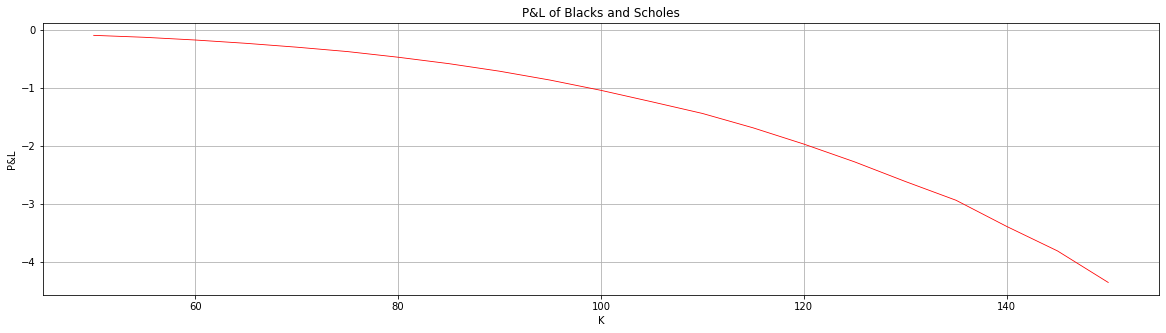

In [123]:
#ploting
plt.figure(figsize=(20,5))
plt.plot(Ks, Y2, 'r-', linewidth=0.8)
plt.xlabel("K")
plt.ylabel("P&L")
plt.title('P&L of Blacks and Scholes')
plt.grid()
print("Used parameters :")
print("n = %1.1f" %(n))
print("Sample size = %d" %(sample_size))       
print("sigma_0 = %1.3f " %(sigma_0))
print("lamda = %1.3f" %(lamda))
print("c = %1.3f" %(c))
print("gamma = %1.3f" %(gamma))
print("S0 = %1.3f " %(S0))
print("r = %1.3f " %(r))
plt.show()

Used parameters :
n = 60.000
Sample size = 1000
sigma_0 = 0.200 
lamda = 2.000
c = 0.400
gamma = 0.300
S0 = 100.000 
r = 0.020 


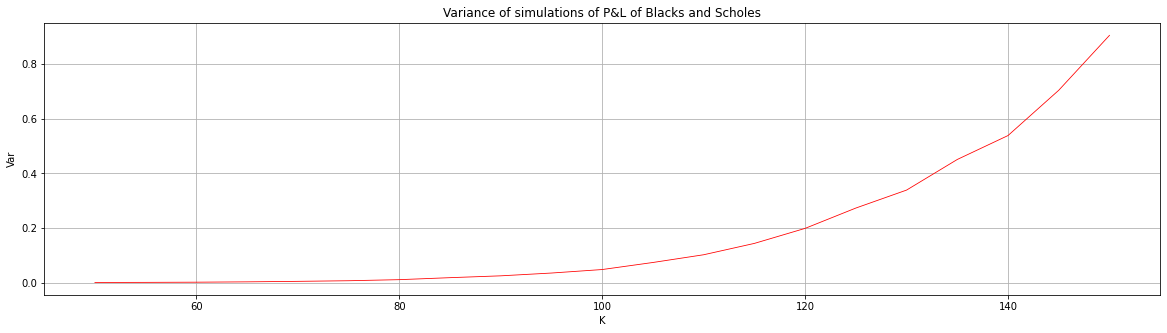

In [124]:
#ploting
plt.figure(figsize=(20,5))
plt.plot(Ks, Var2, 'r-', linewidth=0.8)
plt.xlabel("K")
plt.ylabel("Var")
plt.title('Variance of simulations of P&L of Blacks and Scholes')
plt.grid()
print("Used parameters :")
print("n = %1.3f" %(n))     
print("Sample size = %d" %(sample_size))       
print("sigma_0 = %1.3f " %(sigma_0))
print("lamda = %1.3f" %(lamda))
print("c = %1.3f" %(c))
print("gamma = %1.3f" %(gamma))
print("S0 = %1.3f " %(S0))
print("r = %1.3f " %(r))
plt.show()

In [125]:
n = 100
Ks = np.arange(50, 155, 5)
Y3 = np.array([np.mean(discrete_PnL(K, n=n)) for K in Ks])
Var3 = np.array([np.var(discrete_PnL(K, n=n)) for K in Ks])

Used parameters :
n = 100.0
Sample size = 1000
sigma_0 = 0.200 
lamda = 2.000
c = 0.400
gamma = 0.300
S0 = 100.000 
r = 0.020 


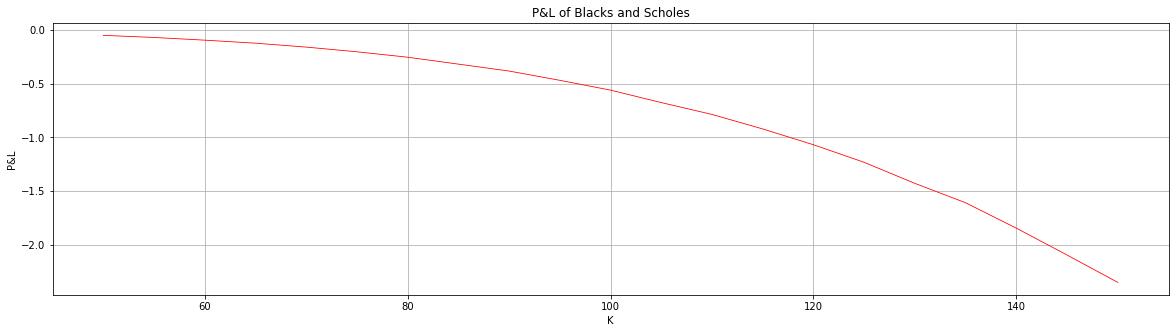

In [126]:
#ploting
plt.figure(figsize=(20,5))
plt.plot(Ks, Y3, 'r-', linewidth=0.8)
plt.xlabel("K")
plt.ylabel("P&L")
plt.title('P&L of Blacks and Scholes')
plt.grid()
print("Used parameters :")
print("n = %1.1f" %(n))
print("Sample size = %d" %(sample_size))       
print("sigma_0 = %1.3f " %(sigma_0))
print("lamda = %1.3f" %(lamda))
print("c = %1.3f" %(c))
print("gamma = %1.3f" %(gamma))
print("S0 = %1.3f " %(S0))
print("r = %1.3f " %(r))
plt.show()

Used parameters :
n = 100.000
Sample size = 1000
sigma_0 = 0.200 
lamda = 2.000
c = 0.400
gamma = 0.300
S0 = 100.000 
r = 0.020 


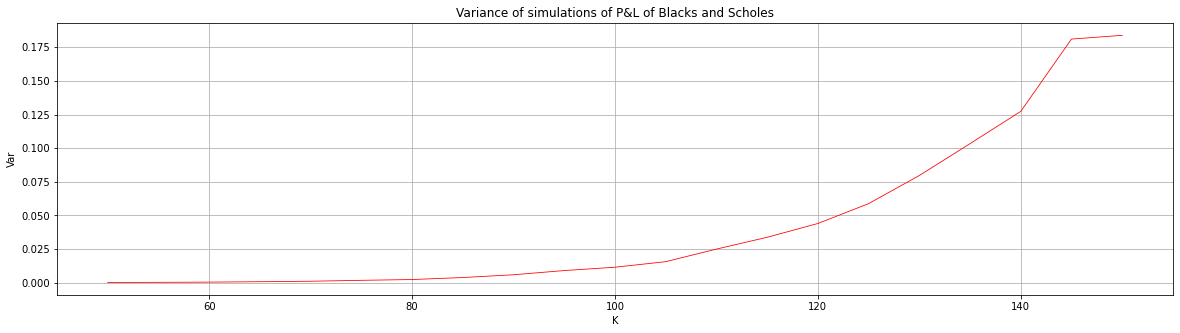

In [127]:
#ploting
plt.figure(figsize=(20,5))
plt.plot(Ks, Var3, 'r-', linewidth=0.8)
plt.xlabel("K")
plt.ylabel("Var")
plt.title('Variance of simulations of P&L of Blacks and Scholes')
plt.grid()
print("Used parameters :")
print("n = %1.3f" %(n))     
print("Sample size = %d" %(sample_size))       
print("sigma_0 = %1.3f " %(sigma_0))
print("lamda = %1.3f" %(lamda))
print("c = %1.3f" %(c))
print("gamma = %1.3f" %(gamma))
print("S0 = %1.3f " %(S0))
print("r = %1.3f " %(r))
plt.show()